In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

c:\Users\asus\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
titanic_df = pd.read_csv('E:/New folder (2)/titanic.csv')
application_train_df = pd.read_csv('E:/New folder (2)/application_train.csv')

In [3]:
print("Titanic Dataset:")
print(titanic_df.head(), "\n")

Titanic Dataset:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                   

In [4]:
print("Application Train Dataset:")
print(application_train_df.head(), "\n")

Application Train Dataset:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...    

In [5]:
print("Titanic Dataset Summary Statistics:")
print(titanic_df.describe(include='all'), "\n")

Titanic Dataset Summary Statistics:
             pclass     survived                  name   sex          age  \
count   1309.000000  1309.000000                  1309  1309  1046.000000   
unique          NaN          NaN                  1307     2          NaN   
top             NaN          NaN  Connolly, Miss. Kate  male          NaN   
freq            NaN          NaN                     2   843          NaN   
mean       2.294882     0.381971                   NaN   NaN    29.881138   
std        0.837836     0.486055                   NaN   NaN    14.413493   
min        1.000000     0.000000                   NaN   NaN     0.170000   
25%        2.000000     0.000000                   NaN   NaN    21.000000   
50%        3.000000     0.000000                   NaN   NaN    28.000000   
75%        3.000000     1.000000                   NaN   NaN    39.000000   
max        3.000000     1.000000                   NaN   NaN    80.000000   

              sibsp        parch    tic

In [6]:
print("Application Train Dataset Summary Statistics:")
print(application_train_df.describe(include='all'), "\n")

Application Train Dataset Summary Statistics:
           SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          

In [7]:
print("Titanic Dataset Info:")
print(titanic_df.info(), "\n")

Titanic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None 



In [8]:
print("Application Train Dataset Info:")
print(application_train_df.info(), "\n")

Application Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None 



In [9]:
def load_application_train():
    data = pd.read_csv("application_train.csv")
    return data

In [10]:
df = load_application_train()
print(df.shape)  

(307511, 122)


In [11]:
def load():
    data = pd.read_csv("titanic.csv")
    return data

In [12]:
df = load()
print(df.shape) 

(1309, 14)


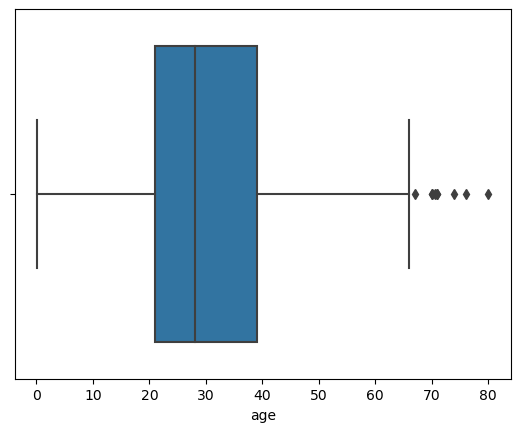

In [13]:
sns.boxplot(x=df["age"])
plt.show() 

In [14]:
q1 = df["age"].quantile(0.25)
q3 = df["age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

In [15]:
print(df[(df["age"] < low) | (df["age"] > up)])


      pclass  survived                                               name  \
9          1         0                            Artagaveytia, Mr. Ramon   
14         1         1               Barkworth, Mr. Algernon Henry Wilson   
61         1         1  Cavendish, Mrs. Tyrell William (Julia Florence...   
81         1         0                       Crosby, Capt. Edward Gifford   
135        1         0                          Goldschmidt, Mr. George B   
285        1         0                                 Straus, Mr. Isidor   
506        2         0                        Mitchell, Mr. Henry Michael   
727        3         0                               Connors, Mr. Patrick   
1235       3         0                                Svensson, Mr. Johan   

         sex   age  sibsp  parch      ticket      fare    cabin embarked boat  \
9       male  71.0      0      0    PC 17609   49.5042      NaN        C  NaN   
14      male  80.0      0      0       27042   30.0000      A23    

In [16]:
print(df[(df["age"] < low) | (df["age"] > up)].index)


Index([9, 14, 61, 81, 135, 285, 506, 727, 1235], dtype='int64')


In [17]:
print(df[(df["age"] < low) | (df["age"] > up)].any(axis=None))  #True


True


In [18]:
print(df[(df["age"] < low)].any(axis=None))  #  False


False


In [19]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [20]:
print(outlier_thresholds(df, "age"))

(-6.0, 66.0)


In [21]:
low, up = outlier_thresholds(df, "fare")
print(df[(df["fare"] < low) | (df["fare"] > up)].head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  


In [22]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

print(check_outlier(df, "age"))    # True  (yes, there is at least 1 outlier.)
print(check_outlier(df, "fare"))   # True  (yes, there is at least 1 outlier.)

True
True


In [23]:
df = load()

In [24]:
low, up = outlier_thresholds(df, "fare")
#Shape of data with outliers
print(df.shape) # (891, 12)

(1309, 14)


In [25]:
print(df[~((df["fare"] < low) | (df["fare"] > up))].shape) #(775,12) 


(1138, 14)


In [26]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    '''
    Returns categorical columns list, numerical columns list and categorical but cardinal column list.

    Parameters
    ----------
    dataframe: dataframe
        main dataframe
    cat_th: int, float
        threshold for the number of unique variable of a column that seems numerical but actually categorical
    car_th: int, float
        threshold for the number of unique variable of a column that seems categorical but actually cardinal
    
    Returns
    -------
    cat_cols: list
        list of categorical columns
    num_cols: list
        list of numerical columns
    cat_but_car: list
        list of of cardinal columns
    
    Notes
    ------
    -> cat_cols + num_cols + cat_but_car = the number of columns of dataframe
    -> cat_cols includes num_but_cat
    -> Categorical variables with numerical appearance are also included in categorical variables.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    '''

In [27]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit




print(outlier_thresholds(df, "age")) # (-6.6875, 64.8125)
#As you can see, if age is below -6.68 or higher 64.81, we can say that
#it is an outlier. But be careful, age cannot be lower than 0. So we don't
#need to care lower threshold since it is -6.68





low, up = outlier_thresholds(df, "fare")
print(df[(df["fare"] < low) | (df["fare"] > up)].head())

'''
    PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked
1             2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0  PC 17599   71.2833          C85        C
27           28         0       1                     Fortune, Mr. Charles Alexander    male  19.0      3      2     19950  263.0000  C23 C25 C27        S
31           32         1       1     Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1      0  PC 17569  146.5208          B78        C
34           35         0       1                            Meyer, Mr. Edgar Joseph    male  28.0      1      0  PC 17604   82.1708          NaN        C
52           53         1       1           Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1      0  PC 17572   76.7292          D33        C
'''





#Write a function that check if there is any outliers.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

print(check_outlier(df, "age"))    # True  (yes, there is at least 1 outlier.)
print(check_outlier(df, "fare"))   # True  (yes, there is at least 1 outlier.)







#We will try to grab categorical columns, categorical but cardinal columns and
#numerical columns. 

def grab_col_names(dataframe, cat_th=10, car_th=20):
    '''
    Returns categorical columns list, numerical columns list and categorical but cardinal column list.

    Parameters
    ----------
    dataframe: dataframe
        main dataframe
    cat_th: int, float
        threshold for the number of unique variable of a column that seems numerical but actually categorical
    car_th: int, float
        threshold for the number of unique variable of a column that seems categorical but actually cardinal
    
    Returns
    -------
    cat_cols: list
        list of categorical columns
    num_cols: list
        list of numerical columns
    cat_but_car: list
        list of of cardinal columns
    
    Notes
    ------
    -> cat_cols + num_cols + cat_but_car = the number of columns of dataframe
    -> cat_cols includes num_but_cat
    -> Categorical variables with numerical appearance are also included in categorical variables.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    '''


    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car




cat_cols, num_cols, cat_but_car = grab_col_names(df)
'''
Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
'''



num_cols = [col for col in num_cols if col not in "PassengerId"]
print(num_cols)  #  ['Age', 'Fare']



#We will check outliers in numerical columns.
for col in num_cols:
    print(col, check_outlier(df, col))
'''
Age True
Fare True
'''

(-6.0, 66.0)
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St

'\nAge True\nFare True\n'

In [28]:
#Let's import application_train.csv
dff = load_application_train()

cat_cols, num_cols, cat_but_car = grab_col_names(dff)
'''
Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39
'''


#Although 'SK_ID_CURR' is a numerical column, it is irrelevant for us. Therefore,
#we will remove it from num_cols
num_cols.remove('SK_ID_CURR')

print()
print()

#Let's see which numerical columns have outliers.
for col in num_cols:
    print(col, check_outlier(dff, col))

'''
CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
...
Output is truncated.
'''





#The function below will show us the outlier values for the associated column.
#If there are outliers more than 10, it will only show us first 5 (f = 5) outliers.
#Otherwise, it will show all outliers. 

def grab_outliers(dataframe, col_name, outlier_index=False, f = 5):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head(f))
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if outlier_index:
        out_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return out_index





age_index = grab_outliers(df, "age", True)
'''
     PassengerId  Survived  Pclass                            Name   Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male  66.0      0      0  C.A. 24579  10.5000   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male  65.0      0      1      113509  61.9792   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male  71.0      0      0    PC 17754  34.6542    A5        C
116          117         0       3            Connors, Mr. Patrick  male  70.5      0      0      370369   7.7500   NaN        Q
280          281         0       3                Duane, Mr. Frank  male  65.0      0      0      336439   7.7500   NaN        Q
'''

#Now see the index of outliers...
print(age_index) # Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE Tru

In [35]:
#Let's import titanic data.
df = load()


###############################################
#Remove Outliers..
###############################################
low, up = outlier_thresholds(df, "fare")
#Shape of data with outliers
print(df.shape) # (891, 12)



#Be careful! We used tilda (~) in order to see the shape of data without outliers!
#There are 116 outliers for 'Fare' variable, therefore if we only remove Fare outliers,
#our new data will have (775,12) 
print(df[~((df["fare"] < low) | (df["fare"] > up))].shape) #(775,12) 




#We can write a function for this!!!
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers




cat_cols, num_cols, cat_but_car = grab_col_names(df)
'''
Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
'''
if 'PassengerId' in num_cols:
    num_cols.remove('PassengerId')

for col in num_cols:
    df = remove_outlier(df, col)





#Now we removed 'Age' outliers and 'Fare' outliers. Age has 10 outliers and Fare has 116 outliers,
#therefore we removed 126 outliers. 
print(df.shape) # (765,12) 





###############################################
#Re-assignment with thresholds..
###############################################
##Now we will assign outliers with thresholds. We can write a function for this
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit




#Import titanic data.
df = load()




cat_cols, num_cols, cat_but_car = grab_col_names(df)
'''
Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
'''
if 'PassengerId' in num_cols:
    num_cols.remove('PassengerId')

# Loop through the numerical columns to remove outliers
for col in num_cols:
    df = remove_outlier(df, col)

'''
age True
fare True
'''




#Now replace these outliers with thresholds.
for col in num_cols:
    replace_with_thresholds(df, col)



#After replacing, we shouldn't have any outlier. So let's check again.
for col in num_cols:
    print(col, check_outlier(df, col))

'''
age False
fare False
'''

(1309, 14)
(1138, 14)
Observations: 1309
Variables: 14
cat_cols: 6
num_cols: 3
cat_but_car: 5
num_but_cat: 4
(1132, 14)
Observations: 1309
Variables: 14
cat_cols: 6
num_cols: 3
cat_but_car: 5
num_but_cat: 4
age False
fare False
body False


'\nage False\nfare False\n'

(53940, 10)
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
(53940, 7)
   carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75
carat True
depth True
table True
price True
x True
y True
z True
(1889, 7)
(2545, 7)
[-1.58352526 -1.59732899 -1.62278873 ... -1.06721815 -1.00809552
 -1.00849038]
[-8.60430658 -8.20889984 -5.86084355 -4.98415175 -4.81502092]


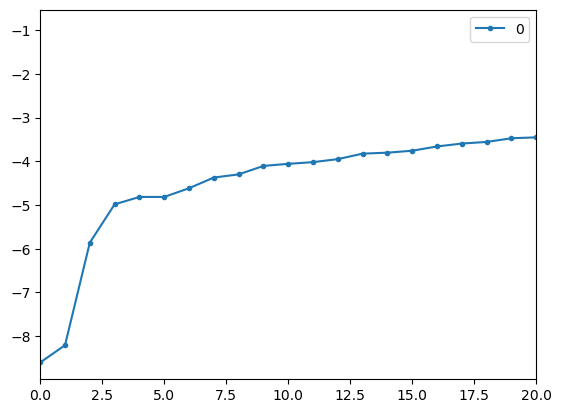

In [36]:
#Let's look at diamonds dataset. There are 53940 rows.
df = sns.load_dataset('diamonds')
print(df.shape)  #  (53940, 10)
print(df.head())

'''
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
'''




#Remove non numeric columns.
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
print(df.shape)   #  (53940, 7)
print(df.head())

'''
   carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75
'''




#Let's check columns that contain outliers.
for col in df.columns:
    print(col, check_outlier(df, col))

'''
carat True
depth True
table True
price True
x True
y True
z True
'''




#Let's see how many rows contain outlier 'carat'
low, up = outlier_thresholds(df, "carat")
print(df[((df["carat"] < low) | (df["carat"] > up))].shape)  # (1889, 7)
#As you can see there are so many 'carat' outlier.




#see how many rows contain outlier 'depth'
low, up = outlier_thresholds(df, "depth")
print(df[((df["depth"] < low) | (df["depth"] > up))].shape)  # (2545, 7)
#And there are also many 'depth' outlier.




#Now we will create a Local Outlier Factor with n_neighbors = 20
#Generally, we use n_neighbors = 20
#Then, we will transform each point to a score according to the LOF.
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
print(df_scores)
#[-1.58352526 -1.59732899 -1.62278873 ... -1.06721815 -1.00809552  -1.00849038]
#These points are negative and there are 53940 points. The closer to -1, 
#the higher the chance of not being an outlier.




#Let's sort df_scores and see first 5 of them.
print(np.sort(df_scores)[0:5]) # array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])




#Now see first 20 sorted  df_scores.
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()  #IMAGE IS BELOW! LOF.png

In [37]:
th = np.sort(df_scores)[3] # 4th point is our threshold.
print(th)                  # -4.9841





#Now let's look at the rows that are outliers.
print(df[df_scores < th])
'''
       carat  depth  table  price     x      y      z
41918   1.03   78.2   54.0   1262  5.72   5.59   4.42
48410   0.51   61.8   54.7   1970  5.12   5.15  31.80
49189   0.51   61.8   55.0   2075  5.15  31.80   5.12
'''





#And we drop these above 3 rows from our dataset...
print(df.drop(axis=0, labels=df[df_scores < th].index).shape) #(53937, 7)

-4.984151747711709
       carat  depth  table  price     x      y      z
41918   1.03   78.2   54.0   1262  5.72   5.59   4.42
48410   0.51   61.8   54.7   1970  5.12   5.15  31.80
49189   0.51   61.8   55.0   2075  5.15  31.80   5.12
(53937, 7)
